In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import math


In [33]:
%matplotlib inline

In [31]:
df = pd.read_csv('../assets/data/structure_learning/GME_stock.csv')
df.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


In [32]:
df['close_price'].describe()
df['open_price'].describe()

count    4773.000000
mean       23.201005
std        14.695884
min         2.850000
25%        11.360000
50%        21.760000
75%        29.420000
max       354.829987
Name: open_price, dtype: float64

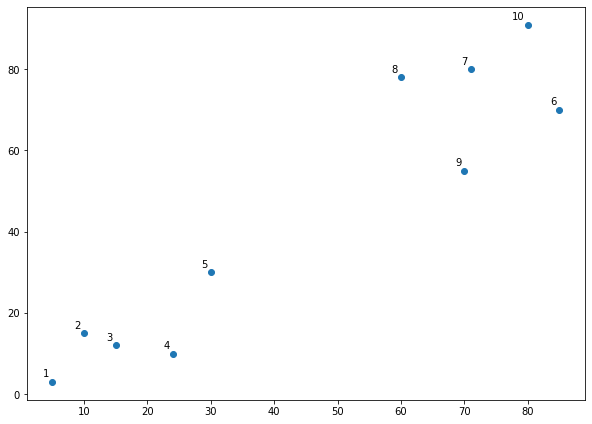

In [38]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])
    
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

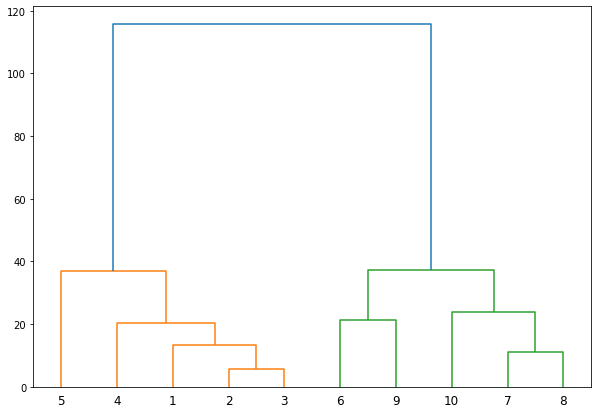

In [42]:
linked = linkage(X, 'complete')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

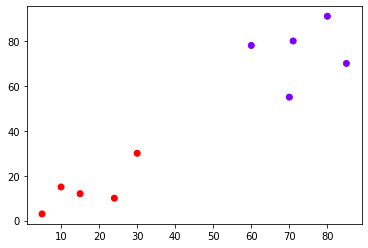

In [46]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

In [61]:
data_experiment = df.head(10).copy()
print(data_experiment)

         date  open_price  high_price   low_price  close_price       volume  \
0  2021-01-28  265.000000  483.000000  112.250000   193.600006   58815800.0   
1  2021-01-27  354.829987  380.000000  249.000000   347.510010   93396700.0   
2  2021-01-26   88.559998  150.000000   80.199997   147.979996  178588000.0   
3  2021-01-25   96.730003  159.179993   61.130001    76.790001  177874000.0   
4  2021-01-22   42.590000   76.760002   42.320000    65.010002  196784300.0   
5  2021-01-21   39.230000   44.750000   37.000000    43.029999   57079800.0   
6  2021-01-20   37.369999   41.189999   36.060001    39.119999   33471800.0   
7  2021-01-19   41.549999   45.520000   36.639999    39.360001   74721900.0   
8  2021-01-15   38.490002   40.750000   34.009998    35.500000   46752200.0   
9  2021-01-14   38.090000   43.060001   33.049999    39.910000   93717400.0   

   adjclose_price  
0      193.600006  
1      347.510010  
2      147.979996  
3       76.790001  
4       65.010002  
5       43

In [79]:
close_price = data_experiment['close_price'].values
print(close_price)
discrete_v = (np.log(close_price[:-1]) - np.log(close_price[1:]))*100
discrete_v = np.append(discrete_v,0)
print(discrete_v)

[193.6000061  347.51000977 147.97999573  76.79000092  65.01000214
  43.02999878  39.11999893  39.36000061  35.5         39.90999985]
[-58.49992633  85.3716369   65.60026654  16.65332982  41.26436186
   9.52637006  -0.61162698  10.32173912 -11.70942188   0.        ]


In [84]:
data_experiment['discrete_value'] = np.array(discrete_v)
print(data_experiment)

         date  open_price  high_price   low_price  close_price       volume  \
0  2021-01-28  265.000000  483.000000  112.250000   193.600006   58815800.0   
1  2021-01-27  354.829987  380.000000  249.000000   347.510010   93396700.0   
2  2021-01-26   88.559998  150.000000   80.199997   147.979996  178588000.0   
3  2021-01-25   96.730003  159.179993   61.130001    76.790001  177874000.0   
4  2021-01-22   42.590000   76.760002   42.320000    65.010002  196784300.0   
5  2021-01-21   39.230000   44.750000   37.000000    43.029999   57079800.0   
6  2021-01-20   37.369999   41.189999   36.060001    39.119999   33471800.0   
7  2021-01-19   41.549999   45.520000   36.639999    39.360001   74721900.0   
8  2021-01-15   38.490002   40.750000   34.009998    35.500000   46752200.0   
9  2021-01-14   38.090000   43.060001   33.049999    39.910000   93717400.0   

   adjclose_price  discrete value  discrete_value  
0      193.600006      -58.499926      -58.499926  
1      347.510010       85

In [98]:
input_data = data_experiment[['close_price', 'discrete_value']].to_numpy()
print(input_data)

[[193.6000061  -58.49992633]
 [347.51000977  85.3716369 ]
 [147.97999573  65.60026654]
 [ 76.79000092  16.65332982]
 [ 65.01000214  41.26436186]
 [ 43.02999878   9.52637006]
 [ 39.11999893  -0.61162698]
 [ 39.36000061  10.32173912]
 [ 35.5        -11.70942188]
 [ 39.90999985   0.        ]]


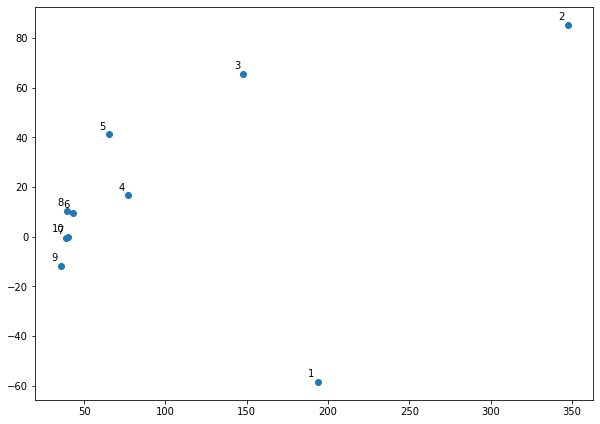

In [99]:
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(input_data[:,0],input_data[:,1], label='True Position')

for label, x, y in zip(labels, input_data[:, 0], input_data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

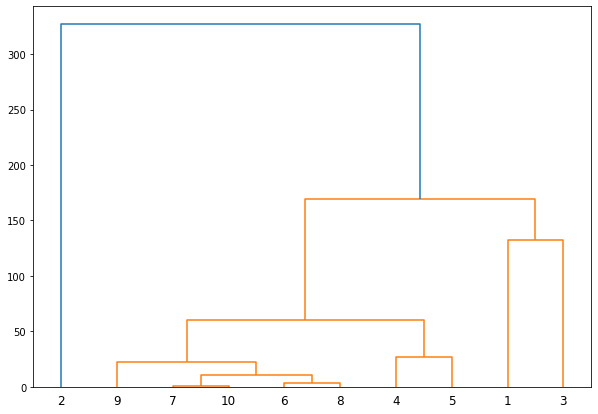

In [101]:
linked = linkage(input_data, 'complete')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

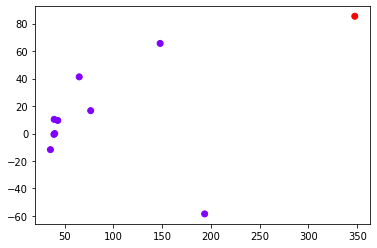

In [104]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(input_data)
plt.scatter(input_data[:,0],input_data[:,1], c=cluster.labels_, cmap='rainbow')